## Pandas

### Instructions

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv, groceries.csv

In [1]:
# Imports needed to complete this assignment
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib as plt


ModuleNotFoundError: No module named 'pymysql'

### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [3]:
#q1 (1)
import pandas as pd
alumni=pd.read_csv('alumni.csv')


### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [4]:
#a) (1)#View the first 4 columns (HEAD)
alumni.head(4)


,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"


In [5]:
#b) (1)#View the last 4 columns (TAIL)
alumni.tail(4)


,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [6]:
#c) (1)DATA(info)
alumni.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [7]:
#d) (1)DATA (dtypes)
import pandas as pd
alumni.dtypes


Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [8]:
#e) (1)Describe
alumni.describe()


,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [9]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")
 

66000.0

In [13]:
#a) (2)REMOVING THE COMMA SIGN
alumni["Savings"]=alumni["Savings ($)"].str.replace("$","").str.replace(",","")

C:\Users\ADMINI~1.MVL\AppData\Local\Temp/ipykernel_15388/467687276.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  alumni["Savings"]=alumni["Savings ($)"].str.replace("$","").str.replace(",","")


b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [14]:
#b) (1)
#alumni.dtypes.Savings
alumni["Savings"]=alumni["Savings ($)"].str.replace("$","").str.replace(",","")
alumni["Savings"]=pd.to_numeric(alumni["Savings"])
alumni["Savings"]


C:\Users\ADMINI~1.MVL\AppData\Local\Temp/ipykernel_15388/15379561.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  alumni["Savings"]=alumni["Savings ($)"].str.replace("$","").str.replace(",","")


0      86000
1     116000
2      52000
3      76000
4      52000
       ...  
83     16000
84     72000
85     46000
86     32000
87     67000
Name: Savings, Length: 88, dtype: int64

### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [15]:
# a) (1)Alumni.dtypes.Savings
alumni.dtypes.Savings


dtype('int64')

b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [19]:
# b) (1)alumni
alumni["Gender"]=alumni["Gender"].replace("M","Male")
alumni["Gender"].value_counts()


Male      49
Female    39
Name: Gender, dtype: int64

In [17]:
# b) (1)
alumni.replace(to_replace= "M",value= "Male")



,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000
...,...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000",16000
84,2008,Male,Single,College Prep Diploma,Yes,65000,12066,"$72,000",72000
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000",46000
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000",32000


c) That didn't the set alumni["Gender"] column however. You will need to update the column when using the replace command 'alumni["Gender"]=<replace command>', show how this is done below

In [ ]:
# c) (1)




d) You can set it directly by using the df.loc command, show how this can be done by using the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'

In [23]:
# d) (1)
for y in alumni.index:
    if alumni.loc[y,"Gender"]=="M":
        alumni.loc[y,"Gender"] ="Male"


e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [24]:
# e) (1)
alumni["Gender"].value_counts()


Male      49
Female    39
Name: Gender, dtype: int64

### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [21]:
# a)(1)import seaborn as sns
alumni["Salary"].median()


75000.0

In [22]:
# b)(1)Mean
alumni["Salary"].mean()

84090.90909090909

In [26]:
# c)(1)
alumni["Salary"].std()


21234.128008173615

d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [28]:
# d) (1)
paid_above_1500=alumni[alumni["Fee"]>1500]
paid_above_1500.head(11)


,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000
5,2007,Female,Married,College Prep Diploma,No,60000,11948,"$67,000",67000
6,2006,Male,Divorced,Standard Diploma,No,160000,11724,"$120,000",120000
7,2006,Female,Single,College Prep Diploma,Yes,85000,11724,"$82,000",82000
8,2007,Male,Married,Standard Diploma,No,75000,11724,"$86,000",86000
9,2005,Female,Single,Standard Diploma,Yes,90000,12717,"$30,000",30000


### Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

AttributeError: module 'matplotlib' has no attribute 'title'

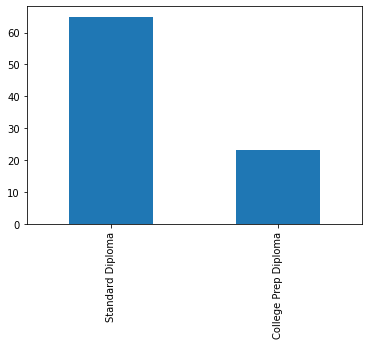

In [37]:
#a) (1)
import matplotlib as plt
alumni['Diploma Type'].value_counts().plot(kind='bar')

plt.title("")
plt.ylabel("Satndard Diploma")
plt.xlabel("Normal Diploma")
plt.show()


b) Now create a box plot comparison between 'Savings' and 'Salary' columns

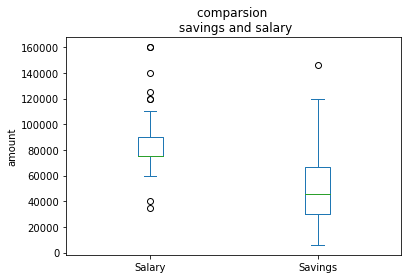

In [47]:
#b) (1)
Savings=alumni["Savings"]
Salary=alumni["Salary"]
data=pd.DataFrame({"Savings":Savings,"Salary":Salary})
da=data[["Salary","Savings"]].plot(kind="box",title="comparsion \n savings and salary")
plt.ylabel("amount")
plt.show()

c) Generate a histogram with the 'Salary' column and use 12 bins.

Text(0.5, 0, 'Counts')

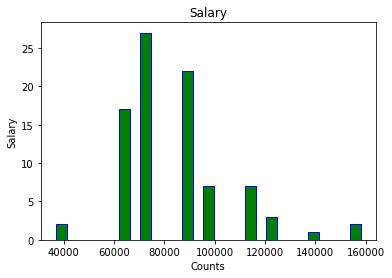

In [49]:
#c) (1)
plt.hist(alumni["Salary"],bins=15,color='g',edgecolor='b',rwidth=0.5)
plt.title("Salary")
plt.ylabel("Salary")
plt.xlabel("Counts")


d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

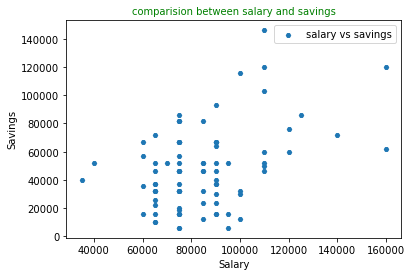

In [51]:
#d) (1)
alumni.plot.scatter(x="Salary",y="Savings",marker="H",label="salary vs savings")
plt.title("comparision between salary and savings",fontsize=10,color="g")
plt.legend(loc="upper right")




### Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [53]:
# Q7 (2)
x=pd.crosstab(alumni["Marital Status"],alumni["Defaulted"],margins=False)
x


Defaulted,No,Yes
Marital Status,,
Divorced,8,11
Married,19,16
Single,9,25
